# Machine Learning Project 2019
## Author; Shane Canny
## Project Title; Analysis of the Boston House Price Data Set

## Introduction. ##

The following report documents the analysis of the 2019 Machine Learning module project. The project requirements are broken into three sections:

1. **Describe:** Use descriptive statistics and plots to describe the Boston House Prices dataset.
2. **Infer:** Use inferential statistics to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t.
3. **Predict:** Use keras to create a neural network that can predict the median house price based on the other variables in the dataset. 

**Pre-requistes**

A number of pre-requistes have to be completed prior to formally conducting analysis on the Boston House Price Data Set. These pre-requistes can be broken down into the following requirements:

1. Import Python Libraries / Packages that maybe required during the analysis of the data set.
2. Importing the data set from sklearn library.
3. Once the data set is imported, listing the data set to understand what is inlcuded in the raw data.

Once the pre-requistes have been met organising the data into a format that can be used to output descriptive statistics and allow inferences to be made can be undertake.

**Pre-Requiste 1**

The first pre-requiste is to import the required python packages to conduct analysis on the Boston House Price data set. The line items below list the python libraries imported to allow analysis of the data set.

In [1]:
## Importing the required libraries for required for later analysis##
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import seaborn as sns
import keras as ks
from keras.models import Sequential
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


**Pre-Requiste 2**

The second pre-requiste is met with the following line items of code. The Boston House Price data set is imported from sklearn as load_boston and renamed as "boston" for future analysis.

To visualise what the data set is made up of, variables were set against the dictionary keys and the variables where printed. 

In [2]:
## Importing the data set from the internal sklearn library within Pythion ##

from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
## As the file is a dictionary, printing the dictionary keys ##
x=boston.keys()
print (x)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


**Pre-Requiste 3**

The thirde and final pre-requiste is content with the following lines. The pre-requistes data preparation steps to allow the author to understand what the data set is made up of and also the basis for creating dataframes that can be edited, graphed and manipulated for the purposes of data analysis.

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
## For later manipluation creating a pandas dataframe of the data set, setting the variable as house ##
house = pd.DataFrame(boston.data)

In [7]:
## Setting each column to its correct designation ##
house.columns=boston.feature_names

In [8]:
## Adding the 14th Column i.e. target to Price
house['PRICE'] = boston.target

In [9]:
## Creating a new DataFrame of the original house price ##
Original_House_Price=house['PRICE']

## Renaming Columns Names for Clarity ##
Original_House_Price.columns = ['Combined Price of Houses']

In [10]:
## Exporting the dataframe to an external location as a .csv file
export_csv=house.to_csv(r'C:\Users\Shane\Desktop\2019 Projects\Machine Learning\bostonhouse.csv')

**Describe**

The first part of the machine learning project is to use descriptive statistics to describe the Boston House Price data set. Below the "describe" command is used to provide a simple break down of the primary hands on statistics in relation to the Boston House Price data set.

A fundamental process in trying to understand what the data implies is using visual aids such as graphs and plots to help hypothesis relationships within the data set. 

In [11]:
## List Descriptive Statistics of the dataframe ##
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
## Creating a Pair Plot for all the house data and using hue coloring for the variable CHAS to identigy graphs that could potential show relationship with location along the river ## ##
##sns.pairplot(house, hue = 'CHAS', height=2.5)
##plt.tight_layout()

The pair plot above is a busy graph and in one aspect can be overwhelming with information. But for the purposes of this analysis and with a critical eye to the inferal section of this project we can focus in on the "CHAS" title along the x-axis. Using the "hue" in conduction with CHAS it has allowed the differentiation of the Charles River dummy variable i.e. (Orange = 1 if tract bounds river; Blue = 0 otherwise). From this we can plot in greater detail data sets that may have a dependency on each other.

In [13]:
## Creating a new DataFrame for the price of houses ##
river_house_price = pd.DataFrame(house, columns = ['CHAS', 'PRICE'])  

In [14]:

## Creating a dataframe of house and prices that are not along the river ##
house_away_from_river=river_house_price[river_house_price.CHAS == 0]

## Renaming Columns Names for Clarity ##
house_away_from_river.columns = ['CHAS', 'Price of House Not Along River']

## Listing Summary Statistics for Price of House ot along the river ##
house_away_from_river.describe()

,CHAS,Price of House Not Along River
count,471.0,471.000000
mean,0.0,22.093843
std,0.0,8.831362
min,0.0,5.000000
25%,0.0,16.600000
50%,0.0,20.900000
75%,0.0,24.800000
max,0.0,50.000000


In [15]:
## Creating a dataframe of houses and prices that are along the river ##
house_along_river=river_house_price[river_house_price.CHAS == 1]

## Renaming Columns Names for Clarity ##
house_along_river.columns = ['CHAS', 'Price of House Along River']

## Listing Summary Statistics for Price of Houses along the river ##
house_along_river.describe()

,CHAS,Price of House Along River
count,35.0,35.000000
mean,1.0,28.440000
std,0.0,11.816643
min,1.0,13.400000
25%,1.0,21.100000
50%,1.0,23.300000
75%,1.0,33.150000
max,1.0,50.000000


In [16]:
## Creating a new table of Price of Housing ##
Price_of_Housing = pd.concat([house_away_from_river,house_along_river,Original_House_Price], axis=1)
Price_of_Housing.describe()

,CHAS,Price of House Not Along River,CHAS,Price of House Along River,PRICE
count,471.0,471.000000,35.0,35.000000,506.000000
mean,0.0,22.093843,1.0,28.440000,22.532806
std,0.0,8.831362,0.0,11.816643,9.197104
min,0.0,5.000000,1.0,13.400000,5.000000
25%,0.0,16.600000,1.0,21.100000,17.025000
50%,0.0,20.900000,1.0,23.300000,21.200000
75%,0.0,24.800000,1.0,33.150000,25.000000
max,0.0,50.000000,1.0,50.000000,50.000000


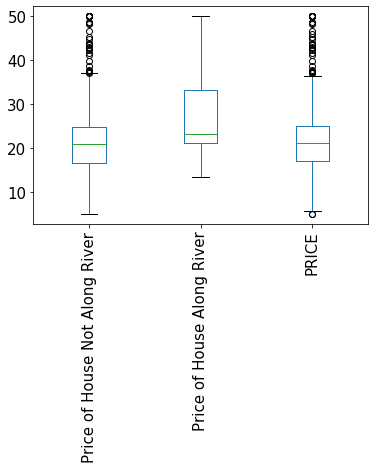

In [17]:
## Creating a BoxPlot of the House prices to visual observe the data ##

boxplot = Price_of_Housing.boxplot(column=['Price of House Not Along River', 'Price of House Along River', 'PRICE'],grid=False, rot=90, fontsize=15)


In [18]:
## Setting x as the value of all the House Prices from the Original Data ##
x = Price_of_Housing.loc[:, 'PRICE']

In [19]:
### Getting ride of the NAN from the House Prices not along the river i.e. CHAS O, so the data can be graphed ##
y=Price_of_Housing['Price of House Not Along River'].dropna().unique()

In [20]:
## Getting ride of the NAN from the House Prices along the river i.e. CHAS 1, so the data can be graphed ##
z=Price_of_Housing['Price of House Along River'].dropna().unique()


<function matplotlib.pyplot.show(*args, **kw)>

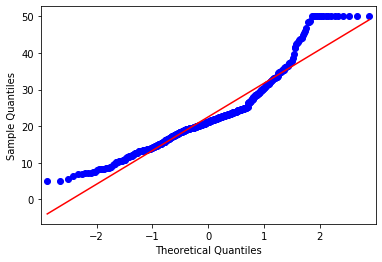

In [21]:
##sns.distplot(x)
## sns.distplot(y)
##sns.distplot(z)

##sm.qqplot(x, dist="norm")

qqplot(x, line='s')
plt.show




<function matplotlib.pyplot.show(*args, **kw)>

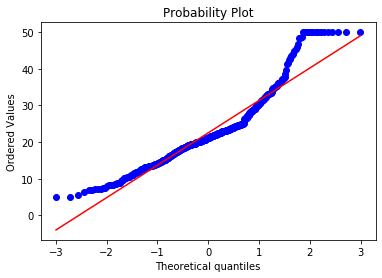

In [22]:
## creating Quantile Plots ## 
stats.probplot(x, dist="norm", plot=plt)
plt.show

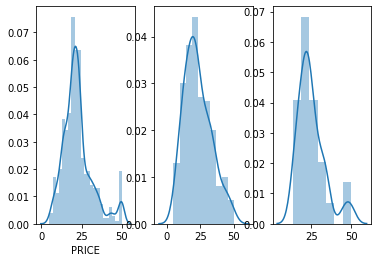

In [23]:
## Creating Distribution Sub Plots of the 3 Sets of Data ##

plt.subplot(1,3,1)
sns.distplot(x)

plt.subplot(1,3,2)
sns.distplot(y)

plt.subplot(1,3,3)
sns.distplot(z)

plt.show()


In [24]:
## Checking for Normality Using the Anderson Darling Test for the Original House Prices i.e. Along and Not Along the River ##
anderson_results_x = stats.anderson(x, dist='norm')
print(anderson_results_x)

AndersonResult(statistic=11.822483502722775, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [25]:
## Checking for Normality Using the Anderson Darling Test for House Prices not along the river i.e. CHAS O, so the data can be graphed ## 
anderson_results_y = stats.anderson(y, dist='norm')
print(anderson_results_y)

AndersonResult(statistic=1.9618480590904142, critical_values=array([0.566, 0.645, 0.773, 0.902, 1.073]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [26]:
## Checking for Normality Using the Anderson Darling Test for House Prices along the river i.e. CHAS 1, so the data can be graphed ##
anderson_results_z = stats.anderson(z, dist='norm')
print(anderson_results_z)

AndersonResult(statistic=0.9219888160312699, critical_values=array([0.518, 0.59 , 0.708, 0.826, 0.983]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [27]:
## Performing Levenes Test to determine equal variance ##
stats.levene(y,z)

LeveneResult(statistic=2.2364910643871942, pvalue=0.13606309495719288)

In [28]:
## Performing Bartletts Test to determine equal variance ##
stats.bartlett(y,z)

BartlettResult(statistic=0.9118499303668617, pvalue=0.3396240537825935)

In [29]:
## Setting my inputs ans outputs for the neural network##
inputs = house[['B','DIS', 'RM', 'CRIM','CHAS']]
outputs = house[['PRICE']]

In [30]:
## Creating a Neural Network ##

m=ks.models.Sequential()
m.add(ks.layers.Dense(10,input_dim=5, activation='linear'))
m.add(ks.layers.Dense(10, activation='linear'))
m.add(ks.layers.Dense(1, activation='linear'))

Instructions for updating:
Colocations handled automatically by placer.


In [31]:
m.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
## Training the Neural Network ##

m.fit(inputs,outputs,epochs=10,batch_size=11)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
506/506 [==============================] - 0s 437us/step - loss: 106.1108
Epoch 2/10
506/506 [==============================] - 0s 156us/step - loss: 93.5209
Epoch 3/10
506/506 [==============================] - 0s 121us/step - loss: 87.7030
Epoch 4/10
506/506 [==============================] - 0s 115us/step - loss: 90.1476
Epoch 5/10
506/506 [==============================] - 0s 111us/step - loss: 85.9979
Epoch 6/10
506/506 [==============================] - 0s 150us/step - loss: 87.3336
Epoch 7/10
506/506 [==============================] - 0s 138us/step - loss: 88.9331
Epoch 8/10
506/506 [==============================] - 0s 142us/step - loss: 81.2664
Epoch 9/10
506/506 [==============================] - 0s 150us/step - loss: 77.2599
Epoch 10/10
506/506 [==============================] - 0s 172us/step - loss: 82.5821


In [33]:

m.predict(inputs)

array([[ 25.970144  ],
       [ 25.547964  ],
       [ 25.935947  ],
       [ 25.515156  ],
       [ 25.746479  ],
       [ 25.037102  ],
       [ 24.938469  ],
       [ 24.990509  ],
       [ 23.947176  ],
       [ 24.08686   ],
       [ 24.764502  ],
       [ 24.775023  ],
       [ 24.601824  ],
       [ 25.109266  ],
       [ 24.398079  ],
       [ 25.01975   ],
       [ 24.521214  ],
       [ 24.707935  ],
       [ 19.173557  ],
       [ 24.894602  ],
       [ 23.863876  ],
       [ 25.06457   ],
       [ 25.356922  ],
       [ 24.98998   ],
       [ 25.024345  ],
       [ 19.833153  ],
       [ 23.921917  ],
       [ 20.319899  ],
       [ 25.109856  ],
       [ 24.852179  ],
       [ 22.979107  ],
       [ 24.11886   ],
       [ 16.32003   ],
       [ 23.03874   ],
       [ 17.302359  ],
       [ 25.690723  ],
       [ 24.56267   ],
       [ 25.42802   ],
       [ 25.338818  ],
       [ 25.472002  ],
       [ 25.81079   ],
       [ 24.928654  ],
       [ 24.337944  ],
       [ 24

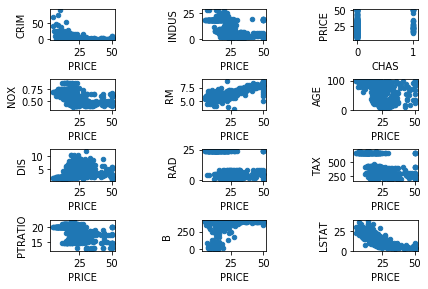

In [88]:
## Creating Subplots of Price vrs all out Column Variables ##

fig, axes = plt.subplots(nrows=4, ncols=3)

house.plot(ax=axes[0,0],kind='scatter',x='PRICE',y='CRIM')
house.plot(ax=axes[0,1],kind='scatter',x='PRICE',y='INDUS')
house.plot(ax=axes[0,2],kind='scatter',x='CHAS',y='PRICE')
house.plot(ax=axes[1,0],kind='scatter',x='PRICE',y='NOX')
house.plot(ax=axes[1,1],kind='scatter',x='PRICE',y='RM')
house.plot(ax=axes[1,2],kind='scatter',x='PRICE',y='AGE')
house.plot(ax=axes[2,0],kind='scatter',x='PRICE',y='DIS')
house.plot(ax=axes[2,1],kind='scatter',x='PRICE',y='RAD')
house.plot(ax=axes[2,2],kind='scatter',x='PRICE',y='TAX')
house.plot(ax=axes[3,0],kind='scatter',x='PRICE',y='PTRATIO')
house.plot(ax=axes[3,1],kind='scatter',x='PRICE',y='B')
house.plot(ax=axes[3,2],kind='scatter',x='PRICE',y='LSTAT')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=1.25,wspace=1.35)


In [ ]:
sns.catplot(x="PRICE", y="NOX", hue="CHAS", kind="bar", data=house)